In [10]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing  import StandardScaler
%matplotlib inline
sns.set_style('white')

In [2]:
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:, 1:].dropna()

In [3]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [5]:
df.default.value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [6]:
df.student.value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [7]:
df['default'] = np.where(df['default'] == 'Yes', 1, 0)
df['student'] = np.where(df['student'] == 'Yes', 1, 0)

In [12]:
df = pd.DataFrame(StandardScaler().fit_transform(df), columns= df.columns)

In [13]:
df.head()

,default,student,balance,income
0,-0.185599,-0.645936,-0.218835,0.813187
1,-0.185599,1.548141,-0.037616,-1.605496
2,-0.185599,-0.645936,0.492410,-0.131212
3,-0.185599,-0.645936,-0.632893,0.164031
4,-0.185599,-0.645936,-0.102791,0.370915


In [14]:
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

# Set up the regression model to predict defaults using all other
# variables as features.
regr1 = linear_model.LinearRegression()
Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]
regr1.fit(X_train, Y_train)
print('\nR-squared simple model:')
print(regr1.score(X_train, Y_train))
origparams = np.append(regr1.coef_, regr1.intercept_)


R-squared simple model:
0.573878496272


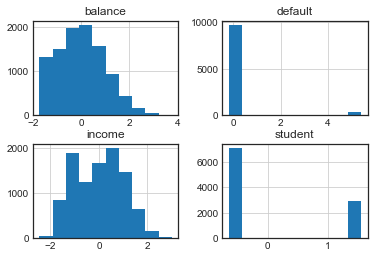

In [15]:
df.hist()
plt.show()

In [16]:
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

In [18]:
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']

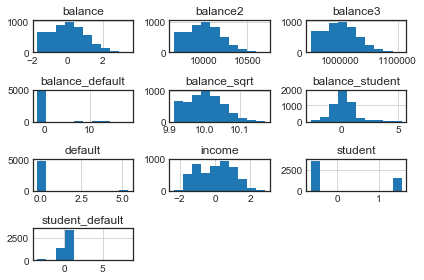

In [20]:
df_train.hist()
plt.tight_layout()
plt.show()

In [21]:
origparams

array([  1.36873063e-02,  -7.59472350e-01,   2.21504775e-05,
        -1.46121929e-03])

In [26]:
# Re-run the model with the new features.
regrBig = linear_model.LinearRegression()
X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]
regrBig.fit(X_train2, Y_train)
print('\nR-squared complex model:')
print(regrBig.score(X_train2, Y_train))

# Store the new parameter estimates for the same features.
newparams = np.append(
    regrBig.coef_[0,0:(len(origparams)-1)],
    regrBig.intercept_)


R-squared complex model:
0.573973445207


In [27]:
newparams

array([ -3.96993983e-03,  -7.58973694e-01,   4.15786637e+03,
         5.53434550e+05])

In [30]:
print('\nParameter Estimates for the same predictors for the small model '
      'and large model:')
compare = np.column_stack((origparams, newparams))
prettycompare = np.array2string(
    compare,
    formatter={'float_kind':'{0:.3f}'.format})


print('\n array1 ')
print(origparams)
print('\n array2 ')
print(newparams)
print('\n both ')
print(compare)
print('\n compare ')
print(prettycompare)


Parameter Estimates for the same predictors for the small model and large model:

 array1 
[  1.36873063e-02  -7.59472350e-01   2.21504775e-05  -1.46121929e-03]

 array2 
[ -3.96993983e-03  -7.58973694e-01   4.15786637e+03   5.53434550e+05]

 both 
[[  1.36873063e-02  -3.96993983e-03]
 [ -7.59472350e-01  -7.58973694e-01]
 [  2.21504775e-05   4.15786637e+03]
 [ -1.46121929e-03   5.53434550e+05]]

 compare 
[[0.014 -0.004]
 [-0.759 -0.759]
 [0.000 4157.866]
 [-0.001 553434.550]]


In [31]:
# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced. Note that by convention, the
# intercept is not regularized. Since we standardized the data
# earlier, the intercept should be equal to zero and can be dropped.

ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
ridgeregr.fit(X_train, Y_train)
print(ridgeregr.score(X_train, Y_train))
origparams = ridgeregr.coef_[0]


ridgeregrBig = linear_model.Ridge(alpha=10, fit_intercept=False)
ridgeregrBig.fit(X_train2, Y_train)
print(ridgeregrBig.score(X_train2, Y_train))
newparams = ridgeregrBig.coef_[0, 0:len(origparams)]

print('\nParameter Estimates for the same predictors for the small model'
      'and large model:')
compare = np.column_stack((origparams, newparams))
prettycompare = np.array2string(
    compare,
    formatter={'float_kind':'{0:.3f}'.format})
print('original params :' , origparams)
print('\n New params :' , newparams)

print('\n compare : ', prettycompare)

0.57387391644
0.573946428961

Parameter Estimates for the same predictors for the small modeland large model:
original params : [  1.36988466e-02  -7.57859433e-01  -3.25298557e-04]

 New params : [-0.00218345 -0.75715689  0.047705  ]

 compare :  [[0.014 -0.002]
 [-0.758 -0.757]
 [-0.000 0.048]]


In [32]:
X_train.corr()

,default,student,balance
default,1.000000,0.045608,0.359896
student,0.045608,1.000000,0.222489
balance,0.359896,0.222489,1.000000


In [33]:
X_train2.corr()

,default,student,balance,balance_sqrt,balance2,balance3,balance_student,balance_default,student_default
default,1.000000,0.045608,0.359896,0.358669,0.362352,0.364813,0.082268,0.934609,0.203987
student,0.045608,1.000000,0.222489,0.222404,0.222655,0.222814,0.191496,0.045258,0.046272
balance,0.359896,0.222489,1.000000,0.999995,0.999980,0.999920,0.077130,0.300658,0.078068
balance_sqrt,0.358669,0.222404,0.999995,1.000000,0.999955,0.999875,0.076103,0.299092,0.077479
balance2,0.362352,0.222655,0.999980,0.999955,1.000000,0.999980,0.079190,0.303802,0.079254
balance3,0.364813,0.222814,0.999920,0.999875,0.999980,1.000000,0.081258,0.306964,0.080452
balance_student,0.082268,0.191496,0.077130,0.076103,0.079190,0.081258,1.000000,0.124622,0.385656
balance_default,0.934609,0.045258,0.300658,0.299092,0.303802,0.306964,0.124622,1.000000,0.294818
student_default,0.203987,0.046272,0.078068,0.077479,0.079254,0.080452,0.385656,0.294818,1.000000


In [36]:
# Store estimates.
estimates = np.append(ridgeregrBig.coef_, [10])

# Storing legend information.
labels = []

#Run the model for many alphas.
for lambd in range(1, 50, 2):
    ridgeregrBig = linear_model.Ridge(alpha=lambd, fit_intercept=False)
    ridgeregrBig.fit(X_train2, Y_train)
    estimates = np.row_stack((
        estimates,
        np.append(ridgeregrBig.coef_,[lambd])))
    


In [37]:
# Make the data pretty.
estimates_df = pd.DataFrame(
    estimates,
    columns=list(X_train2.columns) + ['lambda'])
estimates_df.sort_values(by='lambda', inplace=True, ascending=True)
estimates_df.head()

,default,student,balance,balance_sqrt,balance2,balance3,balance_student,balance_default,student_default,lambda
1,-0.004278,-0.758735,0.191749,-0.017950,0.001952,-0.000019,-0.002308,0.011487,-0.004209,1.0
2,-0.003228,-0.758358,0.115052,-0.010782,0.001169,-0.000012,-0.002949,0.010465,-0.004002,3.0
3,-0.002750,-0.758007,0.082093,-0.007695,0.000833,-0.000008,-0.003258,0.010015,-0.003904,5.0
4,-0.002464,-0.757664,0.063760,-0.005977,0.000646,-0.000006,-0.003457,0.009758,-0.003844,7.0
5,-0.002264,-0.757325,0.052085,-0.004883,0.000528,-0.000005,-0.003606,0.009587,-0.003800,9.0


['default', 'student', 'balance', 'balance_sqrt', 'balance2', 'balance3', 'balance_student', 'balance_default', 'student_default']


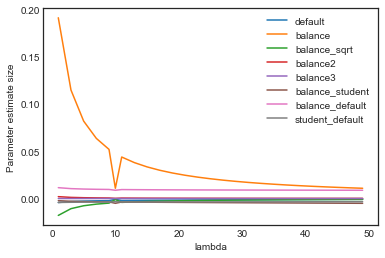

In [38]:

# Leave out the 'student' variable.
# It has very high values and throws off our plot's scale.
varstoplot = list(estimates_df.columns[:9,])
print(varstoplot)
varstoplot.remove('student')

# Plot a line for each parameter.
for var in varstoplot:
    plt.plot(estimates_df['lambda'], estimates_df[var])
    labels.append(var)
plt.xlabel('lambda')
plt.ylabel('Parameter estimate size')
plt.legend(labels)
plt.show()

['default', 'student', 'balance', 'balance_sqrt', 'balance2', 'balance3', 'balance_student', 'balance_default', 'student_default']


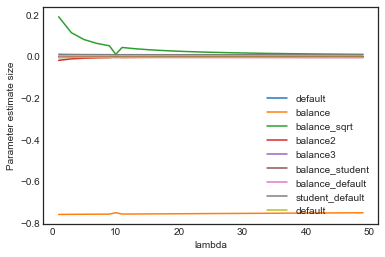

In [39]:
# Leave out the 'student' variable.
# It has very high values and throws off our plot's scale.
varstoplot = list(estimates_df.columns[:9,])
print(varstoplot)
#varstoplot.remove('student')

# Plot a line for each parameter.
for var in varstoplot:
    plt.plot(estimates_df['lambda'], estimates_df[var])
    labels.append(var)
plt.xlabel('lambda')
plt.ylabel('Parameter estimate size')
plt.legend(labels)
plt.show()

# 3.3.3

In [47]:
df2= df.loc[:,:]
df2['balance_sqrt'] = (df['balance'] + 100) ** .5
df2['balance2'] = (df['balance'] + 100) ** 2
df2['balance3'] = (df['balance'] + 100) ** 3
df2['balance_student'] = df['balance'] * df['student']
df2['balance_default'] = df['balance'] * df['default']
df2['student_default'] = df['student'] * df['default']
print(df2.shape)

(10000, 10)


In [48]:
trainsize = int(df2.shape[0] / 2)
df2_test = df2.iloc[trainsize:, :].copy()
df2_train = df2.iloc[:trainsize, :].copy()

Y_train = df2_train['income'].values.reshape(-1, 1)
X_train = df2_train.loc[:, ~(df2_train.columns).isin(['income'])]
Y_test = df2_test['income'].values.reshape(-1, 1)
X_test = df2_test.loc[:, ~(df2_test.columns).isin(['income'])]

In [49]:
print('shape of train data : ',X_train.shape )
print('shape of test data : ',X_test.shape )

shape of train data :  (5000, 9)
shape of test data :  (5000, 9)


C:\Users\gyans\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


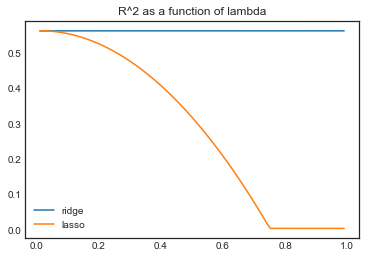

In [62]:
ridge_alpha = []
ridge_r2 = []
lasso_alpha = []
lasso_r2 = []
for lambd in np.linspace(0.01, 0.99, 100):
    ridgeregrBig = linear_model.Ridge(alpha=lambd, fit_intercept=False)
    ridgeregrBig.fit(X_train, Y_train)
    ridge_alpha.append(lambd)
    ridge_r2.append(ridgeregrBig.score(X_test, Y_test))
    
    lassoregrBig = linear_model.Lasso(alpha=lambd, fit_intercept=False)
    lassoregrBig.fit(X_train, Y_train)
    lasso_alpha.append(lambd)
    lasso_r2.append(lassoregrBig.score(X_test, Y_test))

plt.plot(ridge_alpha, ridge_r2, label = 'ridge')
plt.plot(lasso_alpha, lasso_r2, label = 'lasso')
plt.title('R^2 as a function of lambda')
plt.legend()
plt.show()

# The R2 value differs for different range of Lambda in Ridge and Lasso when compared the above plot with the below plot. What to estimate from this ? What should be the Optimum Value of Lambda for Ridge and Lasso ?

C:\Users\gyans\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


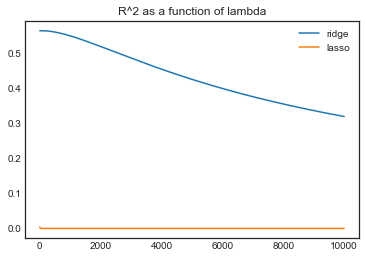

In [75]:
ridge_alpha = []
ridge_r2 = []
lasso_alpha = []
lasso_r2 = []
for lambd in np.linspace(1, 10000, 10000):
    ridgeregrBig = linear_model.Ridge(alpha=lambd, fit_intercept=False)
    ridgeregrBig.fit(X_train, Y_train)
    ridge_alpha.append(lambd)
    ridge_r2.append(ridgeregrBig.score(X_test, Y_test))
    
    lassoregrBig = linear_model.Lasso(alpha=lambd, fit_intercept=False)
    lassoregrBig.fit(X_train, Y_train)
    lasso_alpha.append(lambd)
    lasso_r2.append(lassoregrBig.score(X_test, Y_test))

plt.plot(ridge_alpha, ridge_r2, label = 'ridge')
plt.plot(lasso_alpha, lasso_r2, label = 'lasso')
plt.title('R^2 as a function of lambda')
plt.legend()
plt.show()

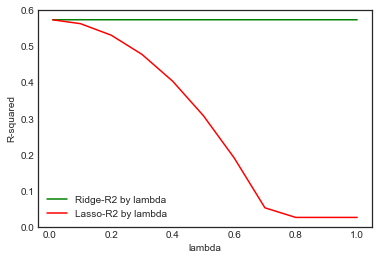

In [65]:
compare_df = pd.DataFrame(columns=['lambda', 'ridge-R2','lasso-R2'])

lams = [0.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0]

for lam in lams:
    ridge = linear_model.Ridge(alpha=lam, fit_intercept=False)
    ridge.fit(X_train, Y_train)
    
    lasso = linear_model.Lasso(alpha=lam)
    lasso.fit(X_train, Y_train)
    
    new_row = pd.DataFrame([[lam, ridge.score(X_train, Y_train), lasso.score(X_train, Y_train)]],
                           columns=['lambda', 'ridge-R2','lasso-R2'])
    compare_df = compare_df.append(new_row, ignore_index=True)
    
    
plt.plot(compare_df['lambda'], compare_df['ridge-R2'], c='g', label='Ridge-R2 by lambda')
plt.plot(compare_df['lambda'], compare_df['lasso-R2'], c='r', label='Lasso-R2 by lambda')
plt.xlabel('lambda')
plt.ylabel('R-squared')
plt.legend()
plt.show()

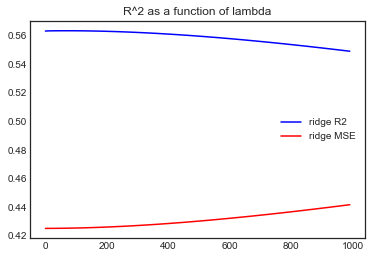

In [74]:
from sklearn.metrics import mean_squared_error
ridge_alpha = []
ridge_r2 = []
ridge_errors = []
for lambd in np.arange(1, 1000, 10):
    ridgeregrBig = linear_model.Ridge(alpha=lambd, fit_intercept=False)
    ridgeregrBig.fit(X_train, Y_train)
    y_pred = ridgeregrBig.predict(X_train)
    ridge_alpha.append(lambd)
    ridge_r2.append(ridgeregrBig.score(X_test, Y_test))
    ridge_errors.append(mean_squared_error(y_pred, Y_train))

    
plt.plot(ridge_alpha, ridge_r2, label = 'ridge R2', color='b')
plt.plot(ridge_alpha, ridge_errors, label = 'ridge MSE', color='r')
plt.title('R^2 as a function of lambda')
plt.legend()
plt.show()




# How to decide on optimum value of regularization param C?
Low MSE ???